# 数值积分

数值积分是一种用于计算定积分近似值的数值方法，特别适用于无法通过解析方法求解或函数形式未知（例如仅有离散数据点）的情况。其基本思想是将积分区间划分为若干小区间，并利用简单的几何形状（如矩形、梯形或抛物线）来近似曲线下的面积

$$
\int_a^b f(x) \, \mathrm{d}x \approx \sum_{i=0}^{n-1} (\text{局部近似面积}).
$$

::::{grid} 2 2 2 2

:::{grid-item}
:columns: 6

```{figure} ../../../images/Math/chap1/lrectangle.png
---
:class: m-auto
:width: 300px
---
矩形积分公式
```

:::

:::{grid-item}
:columns: 6

```{figure} ../../../images/Math/chap1/mrectangle.png
---
:class: m-auto
:width: 300px
---
梯形积分公式
```

:::

:::{grid-item}
:columns: 6

```{figure} ../../../images/Math/chap1/simpson.png
---
:class: m-auto
:width: 300px
---
Simpson 积分公式
```

:::

:::{grid-item}
:columns: 6

```{figure} ../../../images/Math/chap1/gauss.png
---
:class: m-auto
:width: 300px
---
Gaussian 积分公式
```

:::

::::


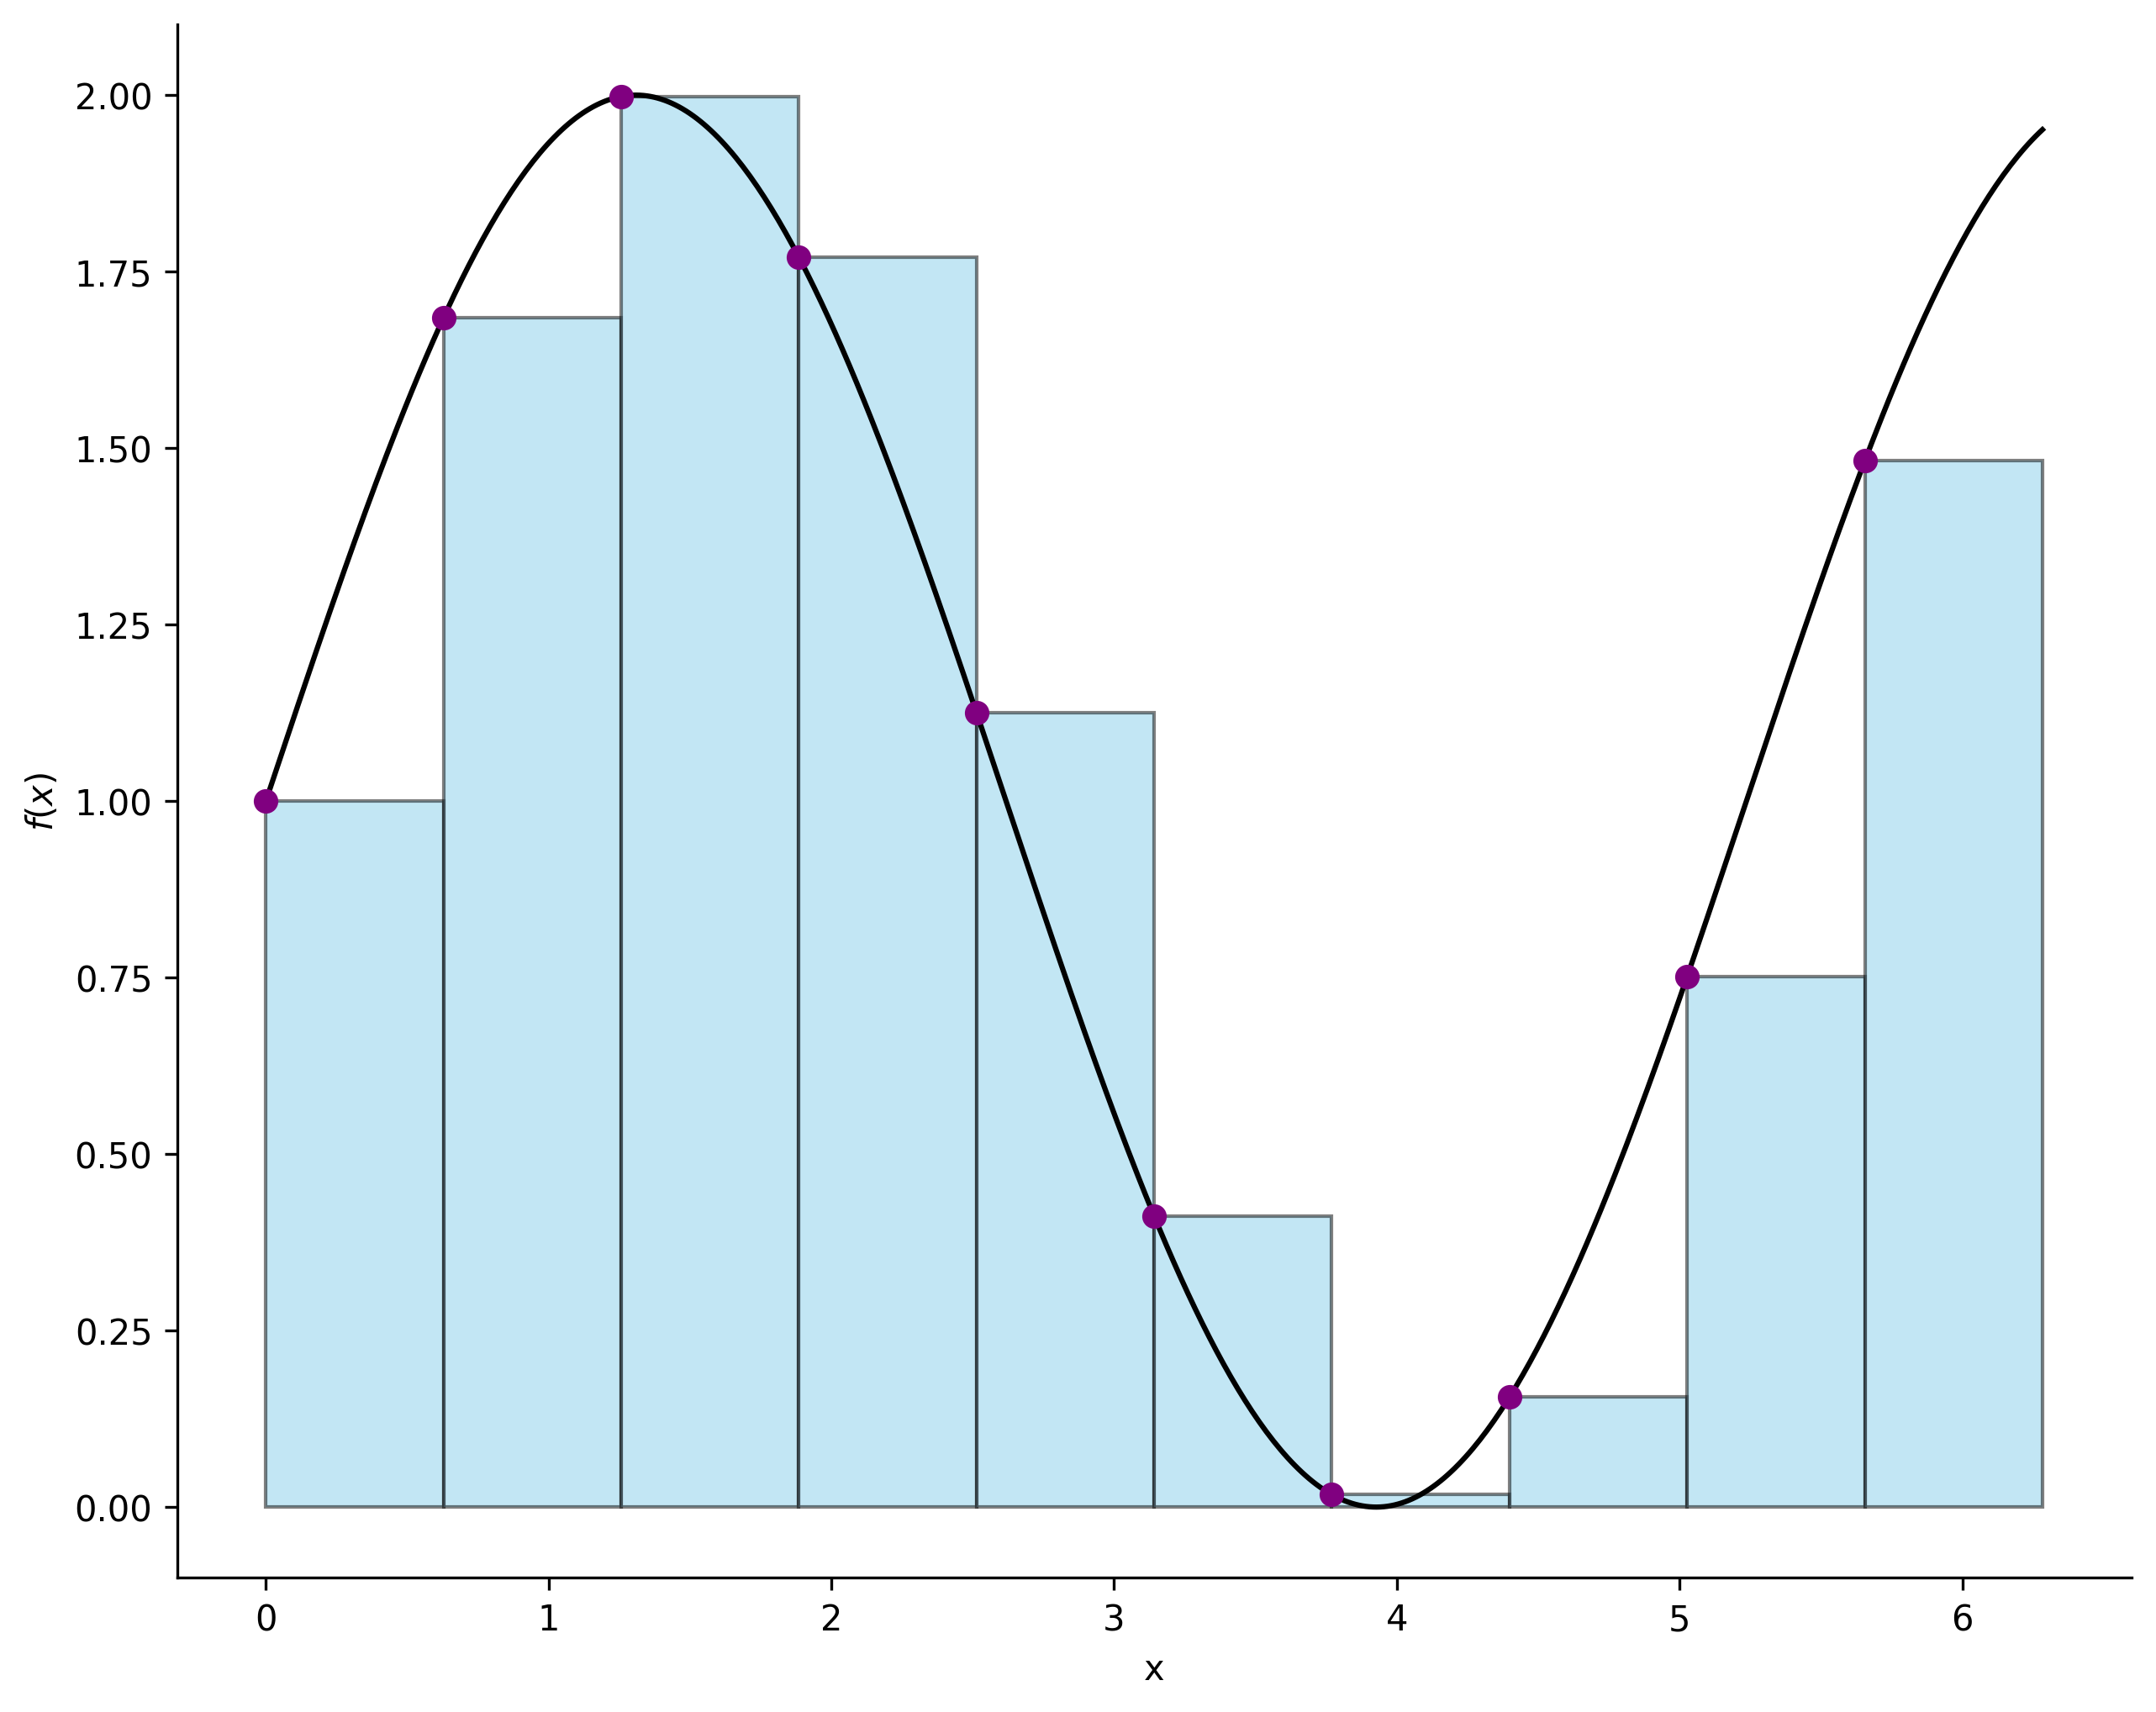

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数 sin(x)
def f(x):
    return np.sin(1.2 * x) + 1

def F(x):
    return -np.cos(x)

# 设置积分区间和分割数
a, b = 0, 2 * np.pi  # 积分区间 [0, pi]
n = 10           # 分割区间数


# 左矩形积分公式实现
def lrectangle_quadrature(func, a, b, n, _plt):
    # """
    # 使用矩形公式对函数 func 在区间 [a, b] 上进行数值积分
    # :param func: 被积函数
    # :param a: 积分下限
    # :param b: 积分上限
    # :param n: 分割区间数
    # :return: 积分值
    # """
    dx = (b - a) / n  # 矩形宽度
    x = np.linspace(a, b, n + 1)  # 矩形左端点
    y = func(x)

    # 绘制积分区域
    for i in range(n):
        x0, x1 = x[i], x[i + 1]
        y0, y1 = func(x0), func(x0)
        _plt.fill([x0, x1, x1, x0], [0, 0, y1, y0], color="skyblue", edgecolor="black", alpha=0.5)

    _plt.scatter(x[0:-1], y[0:-1], color="purple", zorder=5)

    return np.sum(func(x) * dx)

# 右矩形积分公式实现
def rrectangle_quadrature(func, a, b, n, _plt):
    # """
    # 使用矩形公式对函数 func 在区间 [a, b] 上进行数值积分
    # :param func: 被积函数
    # :param a: 积分下限
    # :param b: 积分上限
    # :param n: 分割区间数
    # :return: 积分值
    # """
    dx = (b - a) / n  # 矩形宽度
    x = np.linspace(a, b, n + 1)  # 矩形左端点
    y = func(x)

    # 绘制积分区域
    for i in range(n):
        x0, x1 = x[i], x[i + 1]
        y0, y1 = func(x1), func(x1)
        _plt.fill([x0, x1, x1, x0], [0, 0, y1, y0], color="skyblue", edgecolor="black", alpha=0.5)

    _plt.scatter(x[1:], y[1:], color="purple", zorder=5)

    return np.sum(func(x + dx) * dx), x

# 中点矩形积分公式实现
def mrectangle_quadrature(func, a, b, n, _plt):
    # """
    # 使用矩形公式对函数 func 在区间 [a, b] 上进行数值积分
    # :param func: 被积函数
    # :param a: 积分下限
    # :param b: 积分上限
    # :param n: 分割区间数
    # :return: 积分值
    # """
    dx = (b - a) / n  # 矩形宽度
    x = np.linspace(a, b, n + 1)  # 矩形左端点
    y = func(x)

    integral = (y[0] + y[-1]) / 2 + np.sum(y[1:-1])  # 梯形面积
    integral *= dx  # 乘以宽度

    # 绘制积分区域
    for i in range(n):
        x0, x1 = x[i], x[i + 1]
        y0, y1 = func(x0), func(x1)
        _plt.fill([x0, x1, x1, x0], [0, 0, y1, y0], color="skyblue", edgecolor="black", alpha=0.5)

    _plt.scatter(x, y, color="purple", zorder=5)

    return integral

# 辛普森积分公式实现
def simpson_quadrature(func, a, b, n, _plt):
    # """
    # 使用矩形公式对函数 func 在区间 [a, b] 上进行数值积分
    # :param func: 被积函数
    # :param a: 积分下限
    # :param b: 积分上限
    # :param n: 分割区间数
    # :return: 积分值
    # """

    # 确保 n 为偶数
    if n % 2 != 0:
        raise ValueError("分割区间数 n 必须为偶数")

    dx = (b - a) / n  # 每个小区间的宽度
    x = np.linspace(a, b, n + 1)  # 分割点
    y = func(x)  # 计算函数值

    # 辛普森公式
    integral = dx / 3 * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]))

    # 绘制积分区域
    for i in range(0, n, 2):
        x0, x1, x2 = x[i], x[i + 1], x[i + 2]
        y0, y1, y2 = func(x0), func(x1), func(x2)

        # 计算抛物线的系数 a, b, c
        coefficients = np.polyfit([x0, x1, x2], [y0, y1, y2], 2)
        a, b, c = coefficients

        # 生成平滑的抛物线
        x_parabola = np.linspace(x0, x2, 100)  # 在 [x0, x2] 生成更多点
        y_parabola = a * x_parabola**2 + b * x_parabola + c

        # 填充抛物线下方的区域
        _plt.fill_between(x_parabola, 0, y_parabola, color="skyblue", alpha=0.5)

        # 绘制抛物线
        _plt.plot(x_parabola, y_parabola, color="blue", linestyle="--", linewidth=2, alpha=0.7)

    _plt.scatter(x[0::2], y[0::2], color="purple", zorder=5)
    _plt.scatter(x[1::2], y[1::2], facecolors='none', edgecolors="purple", zorder=5)
    _plt.vlines(x, 0, y, color="purple", linestyle="--", linewidth=0.5, alpha=0.7)   

    return integral

# 高斯积分公式实现
def gaussian_quadrature(func, a, b, n, _plt):
    """
    使用高斯积分公式对函数 func 在区间 [a, b] 上进行数值积分
    :param func: 被积函数
    :param a: 积分下限
    :param b: 积分上限
    :param n: 高斯点的数量
    :param _plt: 绘图实例
    :return: 积分值
    """
    # 获取高斯点和权重（在区间 [-1, 1] 上）
    gauss_points, gauss_weights = np.polynomial.legendre.leggauss(n)

    # 将高斯点和权重映射到区间 [a, b]
    gauss_points_mapped = 0.5 * (b - a) * gauss_points + 0.5 * (a + b)
    gauss_weights_mapped = 0.5 * (b - a) * gauss_weights

    # 计算积分值
    integral = np.sum(gauss_weights_mapped * func(gauss_points_mapped))

    # 绘制积分区域
    x = np.linspace(a, b, 500)
    y = func(x)
    _plt.plot(x, y, label="f(x)", color="black")  # 绘制函数曲线

    # 获取高斯点对应的函数值
    func_values = func(gauss_points_mapped)

    # 构建拉格朗日插值多项式
    def lagrange_interpolation(x):
        result = 0
        for i in range(n):
            # 拉格朗日基函数
            term = func_values[i]
            for j in range(n):
                if i != j:
                    term *= (x - gauss_points_mapped[j]) / (gauss_points_mapped[i] - gauss_points_mapped[j])
            result += term
        return result

    # 绘制拉格朗日插值多项式曲线
    y_approx = lagrange_interpolation(x)
    _plt.plot(x, y_approx, label="Gaussian Approximation", color="blue", linestyle="--", linewidth=2)

    # 填充逼近区域
    _plt.fill_between(x, y, y_approx, color="skyblue", alpha=0.3, label="Approximation Area")

    # 绘制高斯点
    _plt.scatter(gauss_points_mapped, func_values, color="purple", zorder=5)
    _plt.vlines(gauss_points_mapped, 0, func_values, color="purple", linestyle="--", linewidth=0.5, alpha=0.7)

    # 填充下方的区域
    _plt.fill_between(x, 0, y_approx, color="skyblue", alpha=0.5)

    return integral



# 绘制曲线和积分区域
x = np.linspace(a, b, 500)
y = f(x)

# 设置绘图
fig, ax = plt.subplots(figsize=(10, 8), dpi = 300)

# 绘制 f(x) 函数曲线
plt.plot(x, y, label=r"$f(x)$", color="black")


# 计算数值积分
num_res = lrectangle_quadrature(f, a, b, n, plt)
# num_res = rrectangle_quadrature(f, a, b, n, plt)
# num_res = mrectangle_quadrature(f, a, b, n, plt)
# num_res = simpson_quadrature(f, a, b, n, plt)
# num_res = gaussian_quadrature(f, a, b, n, plt)

# 添加图例和标签
# plt.title(r"Numerical Integration of $f(x)$ using Left Rectangle Method")
plt.xlabel("x")
plt.ylabel(r"$f(x)$")
# plt.legend()

# 隐藏所有边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.show()

在每个小区间内，通过简单函数（如直线或抛物线）对被积函数进行近似，可以将积分的计算转化为对被积函数在特定采样点处函数值的加权求和

$$
\int_a^b f(x) \, \mathrm{d}x \approx \sum_{i=0}^{n-1} w_{i}f(x_{i}).
$$